<h1>02 数据探索<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#工具包导入&amp;数据读取" data-toc-modified-id="工具包导入&amp;数据读取-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>工具包导入&amp;数据读取</a></span><ul class="toc-item"><li><span><a href="#工具包导入" data-toc-modified-id="工具包导入-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>工具包导入</a></span></li><li><span><a href="#读取数据" data-toc-modified-id="读取数据-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>读取数据</a></span></li></ul></li><li><span><a href="#数据初步分析" data-toc-modified-id="数据初步分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据初步分析</a></span><ul class="toc-item"><li><span><a href="#数据边界" data-toc-modified-id="数据边界-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据边界</a></span></li><li><span><a href="#训练集与测试集的相关性" data-toc-modified-id="训练集与测试集的相关性-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>训练集与测试集的相关性</a></span></li><li><span><a href="#数据的分布" data-toc-modified-id="数据的分布-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>数据的分布</a></span></li></ul></li><li><span><a href="#数据处理及分析" data-toc-modified-id="数据处理及分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据处理及分析</a></span><ul class="toc-item"><li><span><a href="#将特征数值化" data-toc-modified-id="将特征数值化-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>将特征数值化</a></span></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>数据分析</a></span></li><li><span><a href="#箱线图查看分布" data-toc-modified-id="箱线图查看分布-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>箱线图查看分布</a></span></li><li><span><a href="#直方图和QQ图" data-toc-modified-id="直方图和QQ图-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>直方图和QQ图</a></span></li><li><span><a href="#对比分布" data-toc-modified-id="对比分布-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>对比分布</a></span></li><li><span><a href="#可视化线性关系" data-toc-modified-id="可视化线性关系-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>可视化线性关系</a></span></li></ul></li></ul></div>

# 1 工具包导入&数据读取

##  工具包导入

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## 读取数据

In [3]:
off_train = pd.read_csv('../data/ccf_offline_stage1_train.csv',keep_default_na=True)
off_train.columns=['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('../data/ccf_offline_stage1_test_revised.csv',keep_default_na=True)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('../data/ccf_online_stage1_train.csv',keep_default_na=True)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']

off_train[['user_id','merchant_id','coupon_id']]=off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']]=off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']]=on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [4]:
#离线训练数据
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,nan,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


## 初步探查

In [5]:
#在线训练数据
on_train.head()

,user_id,merchant_id,action,coupon_id,discount_rate,date_received,date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,nan,NaN,NaN,20160321.0
2,14336199,18907,0,nan,NaN,NaN,20160618.0
3,14336199,18907,0,nan,NaN,NaN,20160618.0
4,14336199,18907,0,nan,NaN,NaN,20160618.0


In [6]:
#测试数据
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [7]:
#离线训练数据
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   coupon_id      object 
 3   discount_rate  object 
 4   distance       float64
 5   date_received  float64
 6   date           float64
dtypes: float64(3), object(4)
memory usage: 93.7+ MB


In [8]:
#在线训练数据
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   action         int64  
 3   coupon_id      object 
 4   discount_rate  object 
 5   date_received  float64
 6   date           float64
dtypes: float64(2), int64(1), object(4)
memory usage: 610.4+ MB


In [9]:
#测试集
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        113640 non-null  object 
 1   merchant_id    113640 non-null  object 
 2   coupon_id      113640 non-null  object 
 3   discount_rate  113640 non-null  object 
 4   distance       101576 non-null  float64
 5   date_received  113640 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [10]:
#离线训练数据
off_train.describe()

,distance,date_received,date
count,1.648881e+06,1.053282e+06,7.769840e+05
mean,2.361636e+00,2.016032e+07,2.016040e+07
std,3.483974e+00,1.771416e+02,1.621500e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016013e+07,2.016031e+07
50%,0.000000e+00,2.016032e+07,2.016042e+07
75%,3.000000e+00,2.016051e+07,2.016052e+07
max,1.000000e+01,2.016062e+07,2.016063e+07


In [11]:
#在线训练数据
on_train.describe()

,action,date_received,date
count,1.142983e+07,8.723570e+05,1.077393e+07
mean,2.348193e-01,2.016037e+07,2.016039e+07
std,5.426314e-01,1.560031e+02,1.732371e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016023e+07,2.016023e+07
50%,0.000000e+00,2.016040e+07,2.016041e+07
75%,0.000000e+00,2.016051e+07,2.016052e+07
max,2.000000e+00,2.016062e+07,2.016063e+07


In [12]:
##测试集
off_test.describe()

,distance,date_received
count,101576.000000,1.136400e+05
mean,2.328040,2.016072e+07
std,3.260755,9.019508e+00
min,0.000000,2.016070e+07
25%,0.000000,2.016071e+07
50%,1.000000,2.016072e+07
75%,3.000000,2.016072e+07
max,10.000000,2.016073e+07


In [13]:
#离线训练数据
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id             0
discount_rate    701602
distance         106003
date_received    701602
date             977900
dtype: int64

In [14]:
#在线训练数据
on_train.isnull().sum()

user_id                 0
merchant_id             0
action                  0
coupon_id               0
discount_rate    10557469
date_received    10557469
date               655898
dtype: int64

In [15]:
#测试集
off_test.isnull().sum()

user_id              0
merchant_id          0
coupon_id            0
discount_rate        0
distance         12064
date_received        0
dtype: int64

# 2 数据初步分析

## 2.1 数据边界

对数据日期范围情况进行初步探索。

In [16]:
#重新读取数据，将null原样保持，方便处理
off_train = pd.read_csv('../data/ccf_offline_stage1_train.csv',keep_default_na=False)
off_train.columns=['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']

off_test = pd.read_csv('../data/ccf_offline_stage1_test_revised.csv',keep_default_na=False)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']

on_train = pd.read_csv('../data/ccf_online_stage1_train.csv',keep_default_na=False)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']

off_train[['user_id','merchant_id','coupon_id']] = off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']] = off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']] = on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [17]:
print('offline train date_received')
print(off_train[off_train['date_received']!='null']['date_received'].min())
print(off_train[off_train['date_received']!='null']['date_received'].max())

print('\nonline train date_received')
print(on_train[on_train['date_received']!='null']['date_received'].min())
print(on_train[on_train['date_received']!='null']['date_received'].max())

print('\ntest date_received')
print(off_test['date_received'].min())
print(off_test['date_received'].max())

offline train date_received
20160101
20160615

online train date_received
20160101
20160615

test date_received
20160701
20160731


In [18]:
print('offline train date')
print(off_train[off_train['date']!='null']['date'].min())
print(off_train[off_train['date']!='null']['date'].max())

print('\nonline train date')
print(on_train[on_train['date']!='null']['date'].min())
print(on_train[on_train['date']!='null']['date'].max())

offline train date
20160101
20160630

online train date
20160101
20160630


通过探索可以发现训练数据的用券数据是到6月30日，而领券日期并不是到6月30日，而是到6月15日，这在设计滑窗结构的时候需要注意。

## 2.2 训练集与测试集的相关性

在机器学习比赛及实际应用的时候，不同数据的价值是不一样的，同时也并不是所有得到的数据都是有用的。对测试集和训练集数据的重合情况进行探查对于后续的特征构建的思路有很大的指导作用。

In [21]:
#查看online offline 训练集的 user_id与测试集的重合度
off_train_user=off_train[['user_id']].copy().drop_duplicates()
off_test_user=off_test[['user_id']].copy().drop_duplicates()
on_train_user=on_train[['user_id']].copy().drop_duplicates()

print (f'offline 训练集用户ID数量: {off_train_user.user_id.count()}')
print (f'online 训练集用户ID数量: {on_train_user.user_id.count()}')
print (f'offline 测试集用户ID数量: {off_test_user.user_id.count()}')

off_train_user['off_train_flag'] = 1
off_merge=off_test_user.merge(off_train_user,on='user_id', how="left").reset_index().fillna(0)
print (f"offline 训练集用户与测试集用户重复数量: {off_merge['off_train_flag'].sum()}")

ratio = off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count()
print (f'offline 训练集用户与测试集重复用户在总测试集用户中的占比: {ratio * 100:.4f}%')

on_train_user['on_train_flag']=1
on_merge=off_test_user.merge(on_train_user,on='user_id', how="left").reset_index().fillna(0)
print (f"online 训练集用户与测试集用户重复数量: {on_merge['on_train_flag'].sum()}")

raion = on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count()
print (f'online 训练集用户与测试集重复用户在总测试集用户中的占比: {raion*100:.3f} %')

offline 训练集用户ID数量: 539438
online 训练集用户ID数量: 762858
offline 测试集用户ID数量: 76309
offline 训练集用户与测试集用户重复数量: 76307.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比: 99.9974%
online 训练集用户与测试集用户重复数量: 43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比: 56.553 %


In [22]:
#查看online offline 训练集的 merchant_id 与测试集的重合度
off_train_merchant = off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant = off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant = on_train[['merchant_id']].copy().drop_duplicates()
print ('offline 训练集商家ID数量', off_train_merchant.merchant_id.count())
print ('online 训练集商家ID数量', on_train_merchant.merchant_id.count())
print ('offline 测试集商家ID数量', off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag']=1
off_merge=off_test_merchant.merge(off_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('offline 训练集商家与测试集商家重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集商家与测试集重复商家在总测试集商家中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag']=1
on_merge=off_test_merchant.merge(on_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('online 训练集商家与测试集商家重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集商家与测试集重复商家在总测试集商家中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集商家ID数量 8415
online 训练集商家ID数量 7999
offline 测试集商家ID数量 1559
offline 训练集商家与测试集商家重复数量
1558.0
offline 训练集商家与测试集重复商家在总测试集商家中的占比
0.9993585631815266
online 训练集商家与测试集商家重复数量
0.0
online 训练集商家与测试集重复商家在总测试集商家中的占比
0.0


In [23]:
#查看online offline 训练集的 coupon_id 与测试集的重合度
off_train_coupon=off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon=off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon=on_train[['coupon_id']].copy().drop_duplicates()
print ('offline 训练集优惠券ID数量')
print (off_train_coupon.coupon_id.count())
print ('online 训练集优惠券ID数量')
print (on_train_coupon.coupon_id.count())
print ('offline 测试集优惠券ID数量')
print (off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag']=1
off_merge=off_test_coupon.merge(off_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('offline 训练集优惠券与测试集优惠券重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag']=1
on_merge=off_test_coupon.merge(on_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('online 训练集优惠券与测试集优惠券重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集优惠券ID数量
9739
online 训练集优惠券ID数量
27748
offline 测试集优惠券ID数量
2050
offline 训练集优惠券与测试集优惠券重复数量
1118.0
offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.5453658536585366
online 训练集优惠券与测试集优惠券重复数量
0.0
online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.0


对用户，商家，优惠券在训练集和测试集的重合情况进行探索发现：
- 测试集的用户ID与Offline训练集重复占比0.999以上，与Online训练集重复占比0.565。
- 测试集的商家ID与Offline训练集重复占比0.999以上，与Online训练集没有重复。
- 测试集的优惠券ID与训练集都没有重复。

结论：Online数据价值比较低，后续特征提取将以Offline训练集为主。在提取优惠券统计特征的时候不能通过ID进行合并。
在后续可视化分析中将主要在Offline训练集及测试集之间进行。

## 2.3 数据的分布

In [24]:
off_train['discount_rate'].value_counts()

discount_rate
null       701602
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: count, dtype: int64

In [25]:
off_test['discount_rate'].value_counts()

discount_rate
30:5       59318
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
50:20         97
100:50        97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
0.5           10
300:20        10
200:100        3
0.6            1
500:30         1
0.85           1
0.7            1
Name: count, dtype: int64

In [26]:
off_train['distance'].value_counts()

distance
0       826070
1       227221
10      206484
2       118413
null    106003
3        76598
4        55085
5        41452
6        32483
7        25681
8        21436
9        17958
Name: count, dtype: int64

In [27]:
off_test['distance'].value_counts()

distance
0       43867
1       18474
null    12064
10      10353
2        9523
3        5934
4        4006
5        2977
6        2179
7        1685
8        1359
9        1219
Name: count, dtype: int64

通过初步观察感觉训练集和测试集数据分布比较一致。

# 3 数据处理及分析

## 3.1 将特征数值化

In [28]:
separator=':'
#计算折扣率，将满减和折扣统一

def get_discount_rate(s):
    #因为discount_rate为null的时候一般都是没有使用优惠券，这个时候折扣应该是1
    s = str(s)
    if s=='null':
        return -1
        #return 1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0-float(s[1])/float(s[0])

def get_if_fd(s):
    #获取是否满减（full reduction promotion）
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return 0
    else:
        return 1
        
def get_full_value(s):
    #获取满减的条件
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return -1
    else:
        return int(s[0])
        
def get_reduction_value(s):
    #获取满减的优惠    
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])

def get_month(s):
    #获取月份
    if s[0]=='null':
        return -1
    else:    
        return int(s[4:6])

def get_day(s):
    #获取日期
    if s[0]=='null':
        return -1
    else:    
        return int(s[6:8])
    
def get_day_gap(s):
    #获取日期间隔输入内容为Date:Date_received
    s = s.split(separator)
    if s[0]=='null':
        return -1
    if s[1]=='null':
        return -1
    else:    
        return (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8])) - date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days

def get_label(s):
    #获取Label，输入内容为Date:Date_received
    s = s.split(separator)
    if s[0]=='null':
        return 0
    if s[1]=='null':
        return -1
    elif (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8])) 
          - date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days<=15:
        return 1
    else:
        return -1

In [29]:
def add_feature(df):
    df['if_fd'] = df['discount_rate'].apply(get_if_fd)
    df['full_value'] = df['discount_rate'].apply(get_full_value)
    df['reduction_value'] = df['discount_rate'].apply(get_reduction_value)
    df['discount_rate'] = df['discount_rate'].apply(get_discount_rate)
    df['distance'] = df['distance'].replace('null',-1).astype(int)
    #df['month_received'] = df['date_received'].apply(get_month)
    #df['month'] = df['date'].apply(get_month)
    
    return df
    
def add_label(df):
    df['day_gap'] = df['date'].astype('str') + ':' +  df['date_received'].astype('str')
    df['label'] = df['day_gap'].apply(get_label)
    df['day_gap'] = df['day_gap'].apply(get_day_gap)
    return df

In [30]:
#拷贝数据，免得调试的时候重读文件
dftrain = off_train.copy()
dftest = off_test.copy()

In [31]:
dftrain = add_feature(dftrain)
dftrain = add_label(dftrain)
dftest = add_feature(dftest)

## 3.2 数据分析

In [32]:
dftrain.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date,if_fd,full_value,reduction_value,day_gap,label
0,1439408,2632,null,-1.000000,0,null,20160217,0,-1,-1,-1,-1
1,1439408,4663,11002,0.866667,1,20160528,null,1,150,20,-1,0
2,1439408,2632,8591,0.950000,0,20160217,null,1,20,1,-1,0
3,1439408,2632,1078,0.950000,0,20160319,null,1,20,1,-1,0
4,1439408,2632,8591,0.950000,0,20160613,null,1,20,1,-1,0


In [33]:
dftrain.describe()

,discount_rate,distance,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,1.069696e-01,2.158577e+00,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,9.061683e-01,3.470772e+00,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,7.500000e-01,0.000000e+00,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,9.000000e-01,3.000000e+00,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,9.900000e-01,1.000000e+01,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


In [34]:
dftest.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
0,4129537,450,9983,0.833333,1,20160712,1,30,5
1,6949378,1300,3429,0.833333,-1,20160706,1,30,5
2,2166529,7113,6928,0.900000,5,20160727,1,200,20
3,2166529,7113,1808,0.900000,5,20160727,1,100,10
4,6172162,7605,6500,0.966667,2,20160708,1,30,1


In [35]:
dftest.describe()

,discount_rate,distance,date_received,if_fd,full_value,reduction_value
count,113640.000000,113640.000000,1.136400e+05,113640.000000,113640.000000,113640.000000
mean,0.850671,1.974736,2.016072e+07,0.977420,43.396507,6.089141
std,0.063551,3.248809,9.019508e+00,0.148561,44.239815,5.640310
min,0.333333,-1.000000,2.016070e+07,0.000000,-1.000000,-1.000000
25%,0.833333,0.000000,2.016071e+07,1.000000,30.000000,5.000000
50%,0.833333,1.000000,2.016072e+07,1.000000,30.000000,5.000000
75%,0.900000,3.000000,2.016072e+07,1.000000,30.000000,5.000000
max,0.990000,10.000000,2.016073e+07,1.000000,500.000000,100.000000


In [36]:
dftrain[dftrain.distance >= 0]['distance'].value_counts() / dftrain[dftrain.distance>=0]['distance'].count()

distance
0     0.500988
1     0.137803
10    0.125227
2     0.071814
3     0.046455
4     0.033408
5     0.025139
6     0.019700
7     0.015575
8     0.013000
9     0.010891
Name: count, dtype: float64

In [37]:
dftest[dftest.distance>=0]['distance'].value_counts()/dftest[dftest.distance>=0]['distance'].count()

distance
0     0.431864
1     0.181874
10    0.101924
2     0.093752
3     0.058419
4     0.039438
5     0.029308
6     0.021452
7     0.016589
8     0.013379
9     0.012001
Name: count, dtype: float64

In [38]:
dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].value_counts()/dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].count()

distance
0     0.364509
10    0.183892
1     0.152033
2     0.086069
3     0.058229
4     0.042997
5     0.032928
6     0.026195
7     0.020890
8     0.017433
9     0.014824
Name: count, dtype: float64

In [39]:
dftest[(dftest.distance>=0)]['distance'].value_counts()/dftest[(dftest.distance>=0)]['distance'].count()

distance
0     0.431864
1     0.181874
10    0.101924
2     0.093752
3     0.058419
4     0.039438
5     0.029308
6     0.021452
7     0.016589
8     0.013379
9     0.012001
Name: count, dtype: float64

In [40]:
print ('Offline 训练集满减情况')
dftrain.if_fd.value_counts()/dftrain.if_fd.count()

Offline 训练集满减情况


if_fd
1    0.581241
0    0.418759
Name: count, dtype: float64

In [41]:
print ('测试集满减情况')
dftest.if_fd.value_counts()/dftest.if_fd.count()

测试集满减情况


if_fd
1    0.97742
0    0.02258
Name: count, dtype: float64

## 3.3 箱线图查看分布

<Axes: xlabel='distance'>

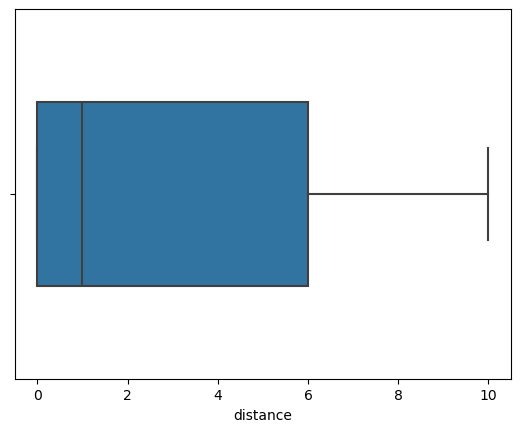

In [49]:
# fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(data = dftrain[(dftrain.label>=0)&(dftrain.distance>=0)], x='distance', orient="v", width=0.5)


<Axes: xlabel='discount_rate'>

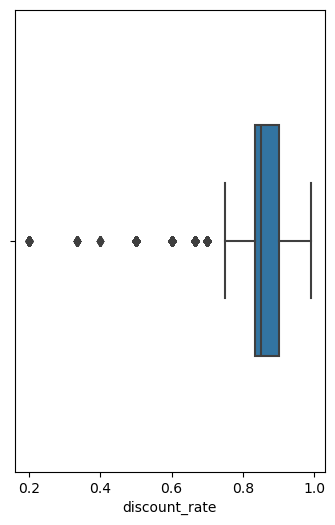

In [50]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(data=dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)], x='discount_rate', orient="v", width=0.5)

## 3.4 直方图和QQ图

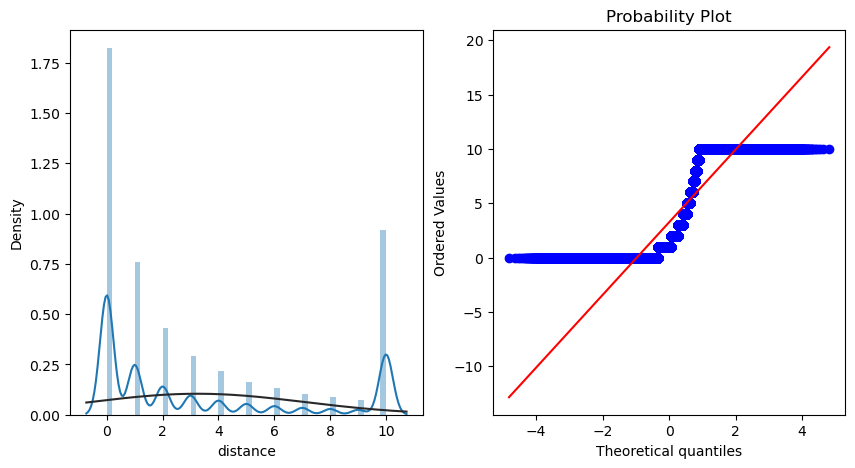

In [51]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], plot=plt)

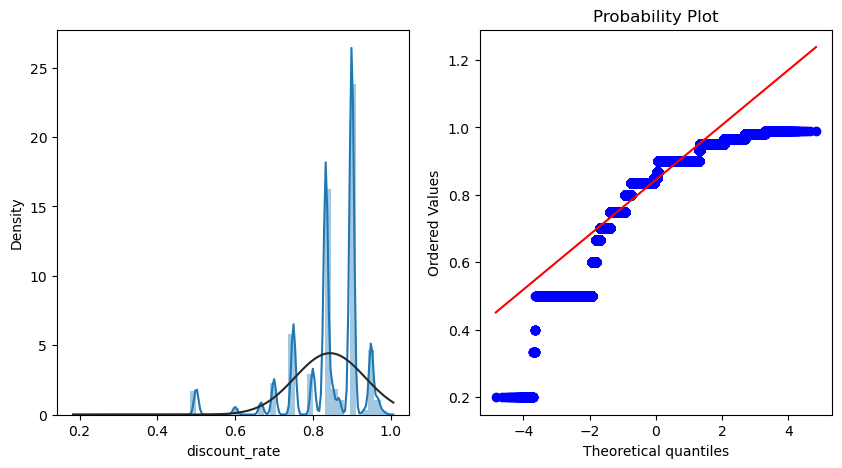

In [52]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'], plot=plt)

## 3.5 对比分布

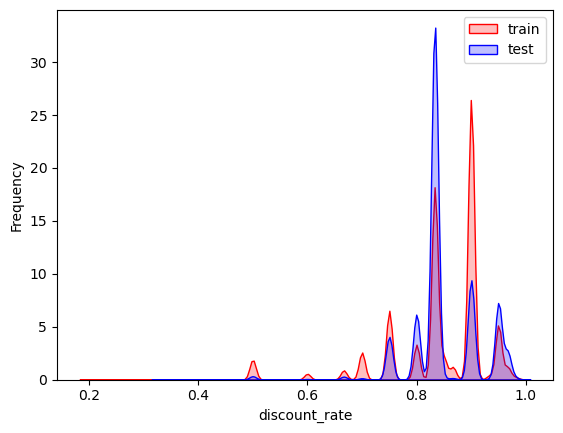

In [53]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.discount_rate>=0)]['discount_rate'], color="Blue", shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

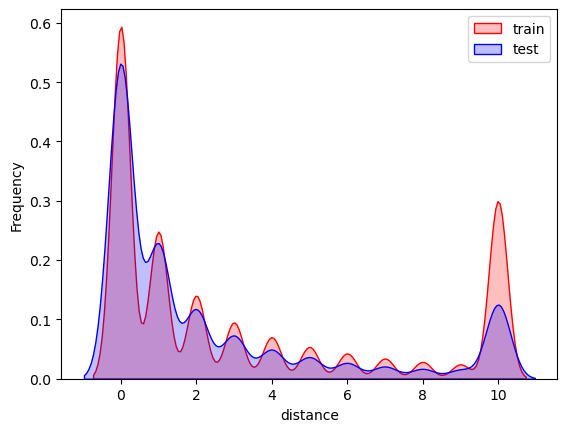

In [54]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.distance>=0)]['distance'], color="Blue", shade=True)
ax.set_xlabel('distance')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

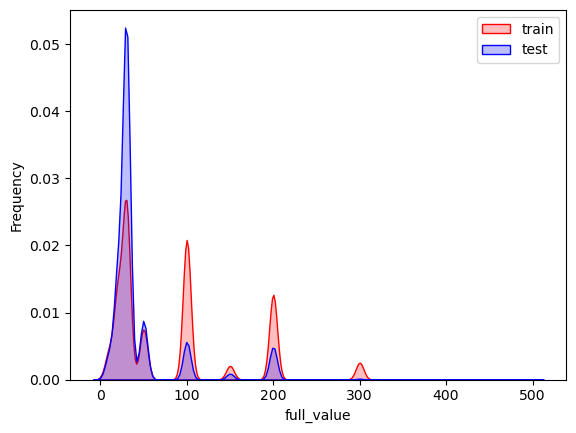

In [55]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.full_value>=0)]['full_value'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.full_value>=0)]['full_value'], color="Blue", shade=True)
ax.set_xlabel('full_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

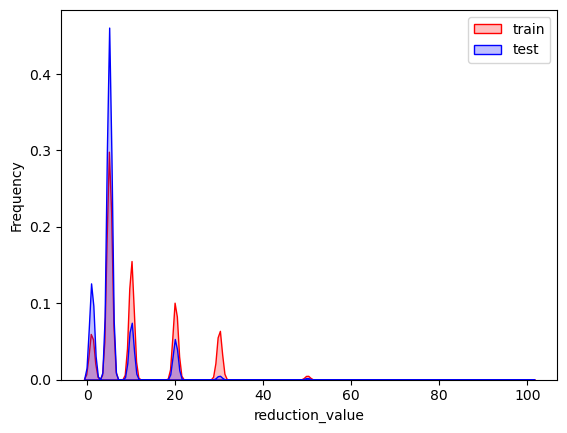

In [56]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.reduction_value>=0)]['reduction_value'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.reduction_value>=0)]['reduction_value'], color="Blue", shade=True)
ax.set_xlabel('reduction_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

## 3.6 可视化线性关系

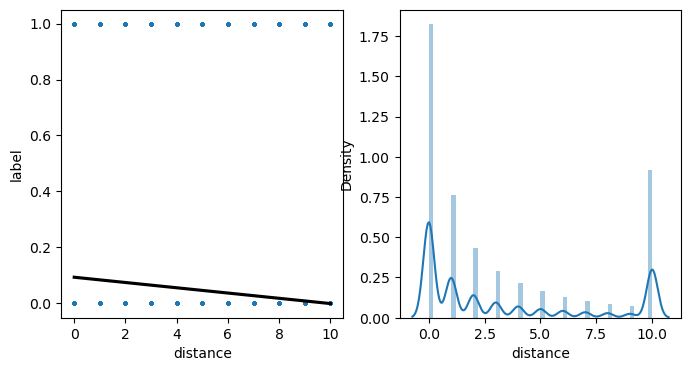

In [57]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='distance', y='label', data=dftrain[(dftrain.label>=0)&(dftrain.distance>=0)][['distance','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('distance')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].dropna())
plt.xlabel('distance')
plt.show()

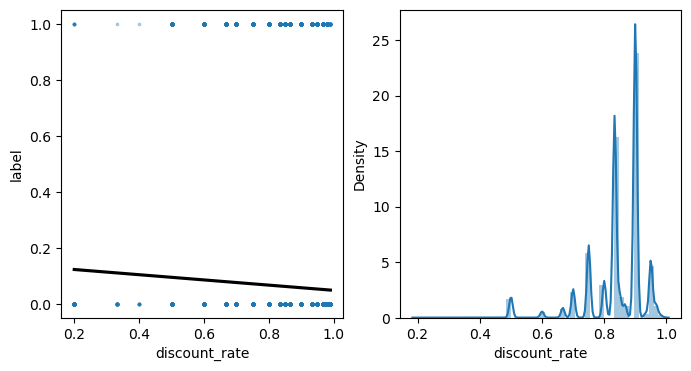

In [58]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='discount_rate', y='label', data=dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)][['discount_rate','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('discount_rate')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'].dropna())
plt.xlabel('discount_rate')
plt.show()